In [1]:
#Import all of my libraries
import pandas as pd 
import numpy as np 
import datetime as dt 
from pathlib import Path 

%matplotlib inline 

In [3]:
#Import Whale returns file 
whaleRet = pd.read_csv('Resources/whale_returns.csv')
whaleRet.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [13]:
#Count Nulls 
whaleRet.isna().values.sum()

4

In [15]:
#Drop Nulls 
whaleRet.dropna()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


In [16]:
#Import Algorithmic Returns file 
algoRet = pd.read_csv('Resources/algo_returns.csv')
algoRet.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [18]:
#Count Nulls
algoRet.isna().values.sum()

6

In [19]:
#Drop Nulls 
algoRet.dropna()

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


In [119]:
#Import S&P 500 history file 
spFive = pd.read_csv('Resources/sp500_history.csv')
spFive.head()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [120]:
#Check the data Types 
spFive.dtypes

Date     object
Close    object
dtype: object

In [121]:
#Fix the data types 
spFive["Close"] = spFive["Close"].str.replace("$", "")
spFive["Close"] = spFive["Close"].str.replace(",", "")
spFive["Close"] = spFive["Close"].astype("float")
spFive.dtypes

<ipython-input-121-a398080808e2>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  spFive["Close"] = spFive["Close"].str.replace("$", "")


Date      object
Close    float64
dtype: object

In [124]:
# Calculate Daily Returns
spFive = spFive["Close"].pct_change()
spFive.head()

0         NaN
1   -0.008764
2   -0.001011
3   -0.001577
4    0.002279
Name: Close, dtype: float64

In [134]:
# Drop nulls
spFive = spFive.dropna()
spFive.head()

1   -0.008764
2   -0.001011
3   -0.001577
4    0.002279
5   -0.000509
Name: Close, dtype: float64

In [179]:
# Rename `Close` Column to be specific to this portfolio.
spFive = spFive.rename(columns = {"Close": "S&P 500"})
spFive.head()

TypeError: rename() got an unexpected keyword argument 'columns'

In [180]:
#COMBINE THEM ALL
comBined = pd.concat([whaleRet, algoRet, spFive], axis="columns", join="inner")
comBined.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Date,Algo 1,Algo 2,Close
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,2014-05-29,0.003978,NaN,-0.008764
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213,2014-05-30,0.004464,NaN,-0.001011
3,2015-03-05,0.004016,0.004076,0.002355,0.006726,2014-06-02,0.005692,NaN,-0.001577
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,2014-06-03,0.005292,NaN,0.002279
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652,2014-06-04,-0.001838,NaN,-0.000509


<AxesSubplot:title={'center':'Daily Returns'}>

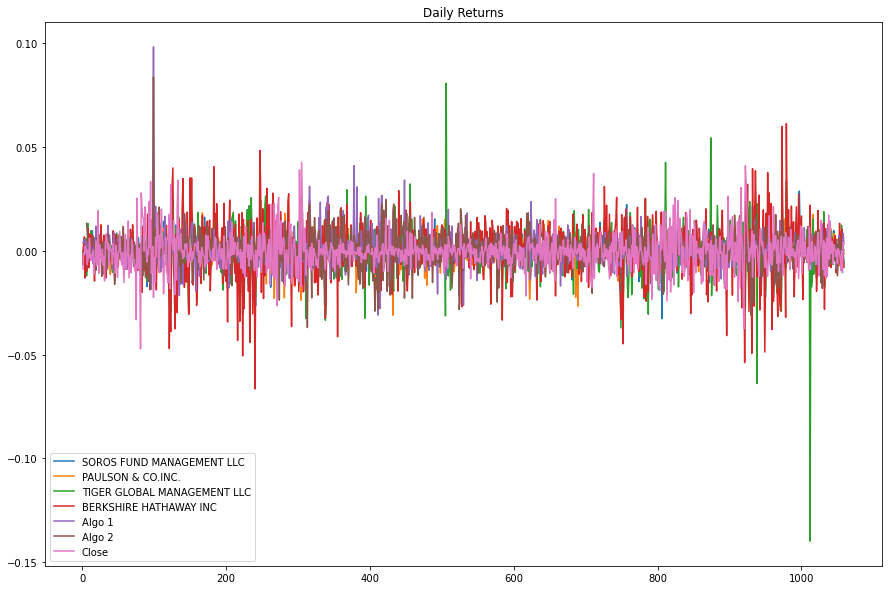

In [178]:
# Plot daily returns of all portfolios
comBined.plot(figsize=(15, 10), title="Daily Returns")

In [181]:
#didnt remove the second "date" column before. adding this code fixed my results 
comBined = comBined.drop(columns="Date")

In [182]:
culmRet = (1 + comBined).cumprod()

<AxesSubplot:title={'center':'Cumulative Returns'}>

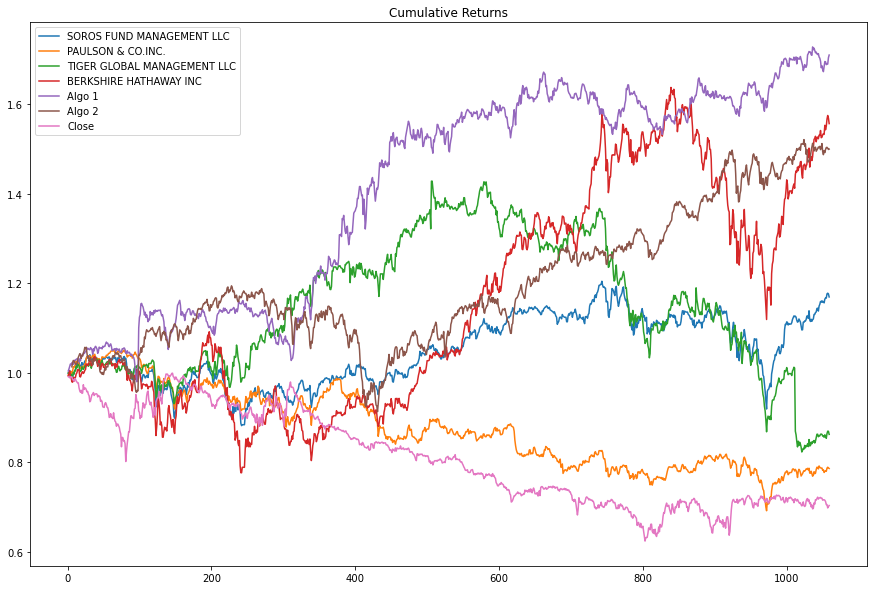

In [183]:
culmRet.plot(figsize=(15, 10), title="Cumulative Returns")

<AxesSubplot:title={'center':'Portfolio Risk'}>

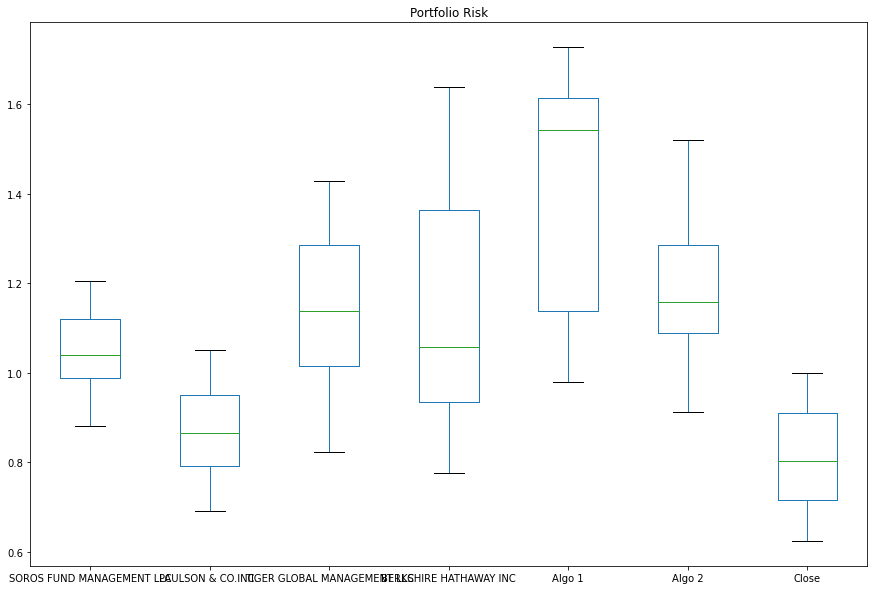

In [184]:
culmRet.plot.box(figsize=(15, 10), title="Portfolio Risk")

In [185]:
culmRet.std()

SOROS FUND MANAGEMENT LLC      0.073730
PAULSON & CO.INC.              0.088385
TIGER GLOBAL MANAGEMENT LLC    0.151043
BERKSHIRE HATHAWAY INC         0.242778
Algo 1                         0.236947
Algo 2                         0.149885
Close                          0.104031
dtype: float64

In [190]:
#Due to my column name change code not working i was forced to use "Close" as a reference
spFiveRisk = culmRet["Close"].std()
culmRet.std() > spFiveRisk

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                          True
Algo 2                          True
Close                          False
dtype: bool

In [191]:
anualStd = culmRet.std() * np.sqrt(252)
anualStd

SOROS FUND MANAGEMENT LLC      1.170421
PAULSON & CO.INC.              1.403073
TIGER GLOBAL MANAGEMENT LLC    2.397739
BERKSHIRE HATHAWAY INC         3.853978
Algo 1                         3.761409
Algo 2                         2.379350
Close                          1.651445
dtype: float64

<AxesSubplot:title={'center':'21 day rolling standar deviation'}>

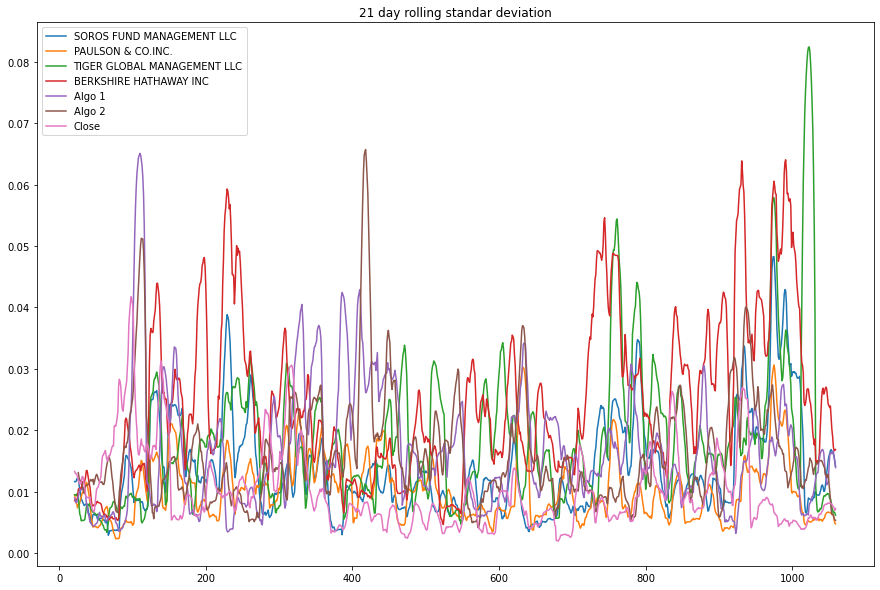

In [192]:
rollStd = culmRet.rolling(window=21).std()
rollStd.plot(figsize=(15, 10), title="21 day rolling standar deviation")

In [194]:
corrDf = culmRet.corr()
corrDf.style.background_gradient(cmap="inferno")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
SOROS FUND MANAGEMENT LLC,1.000000,-0.655115,0.305413,0.900654,0.769882,0.560603,-0.828516
PAULSON & CO.INC.,-0.655115,1.000000,-0.182745,-0.780729,-0.908896,-0.773459,0.890399
TIGER GLOBAL MANAGEMENT LLC,0.305413,-0.182745,1.000000,0.014768,0.359898,-0.304080,-0.253920
BERKSHIRE HATHAWAY INC,0.900654,-0.780729,0.014768,1.000000,0.763490,0.775364,-0.874323
Algo 1,0.769882,-0.908896,0.359898,0.763490,1.000000,0.661282,-0.923192
Algo 2,0.560603,-0.773459,-0.304080,0.775364,0.661282,1.000000,-0.720974
Close,-0.828516,0.890399,-0.253920,-0.874323,-0.923192,-0.720974,1.000000


<AxesSubplot:title={'center':'TIGER GLOBAL MANAGEMENT LLC Beta'}>

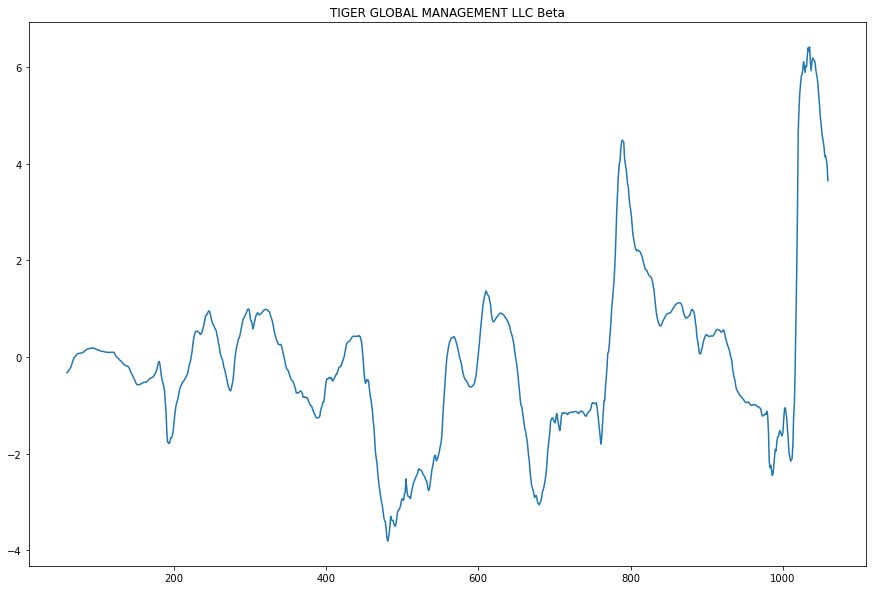

In [195]:
coVar = culmRet["TIGER GLOBAL MANAGEMENT LLC"].rolling(window=60).cov(culmRet["Close"])
vaR = culmRet["Close"].rolling(60).var()
beTa = coVar / vaR
beTa.plot(figsize=(15, 10), title="TIGER GLOBAL MANAGEMENT LLC Beta")

<AxesSubplot:title={'center':'Exponential Weighted Average'}>

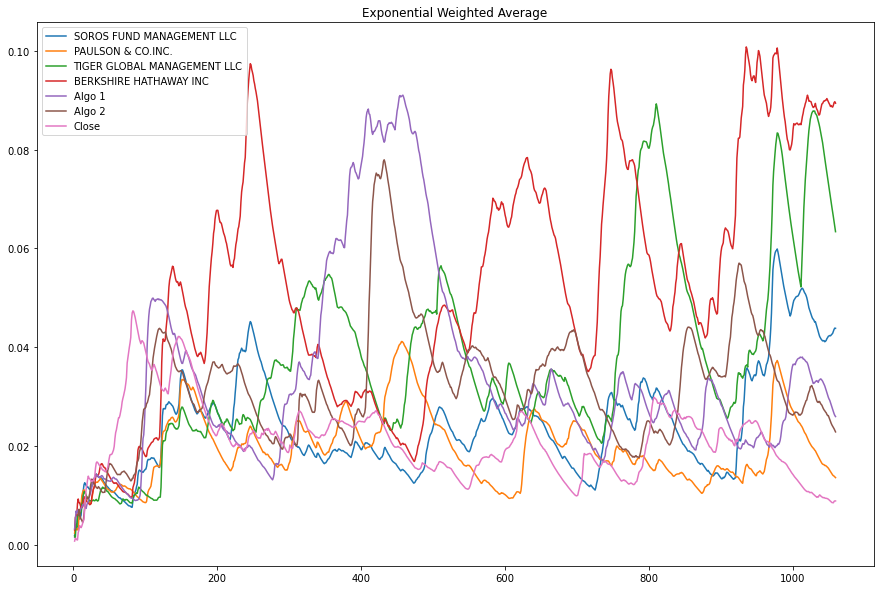

In [196]:
culmRet.ewm(halflife=21).std().plot(figsize=(15, 10), title="Exponential Weighted Average")

In [197]:
sharpRat = (culmRet.mean() * 252) / (culmRet.std() * np.sqrt(252))
sharpRat

SOROS FUND MANAGEMENT LLC      226.047427
PAULSON & CO.INC.              157.345046
TIGER GLOBAL MANAGEMENT LLC    120.473298
BERKSHIRE HATHAWAY INC          75.831367
Algo 1                          94.702643
Algo 2                         127.040726
Close                          123.475447
dtype: float64

<AxesSubplot:title={'center':'Sharp Ratios'}>

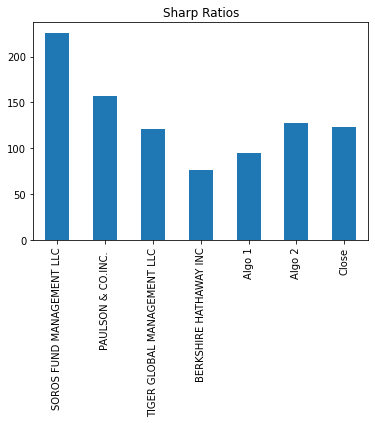

In [198]:
sharpRat.plot(kind="bar", title="Sharp Ratios")

In [201]:
gooGleCsv = Path("Resources/goog_historical.csv")
gooGle = pd.read_csv(
    gooGleCsv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
gooGle = gooGle.sort_index()
gooGle.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [203]:
appLeCsv = Path("Resources/aapl_historical.csv")
appLe = pd.read_csv(
    appLeCsv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
appLe = appLe.sort_index()
appLe.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [204]:
costCsv = Path("Resources/cost_historical.csv")
cost = pd.read_csv(
    costCsv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost = cost.sort_index()
cost.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [205]:
allOfThem = pd.concat([gooGle, appLe, cost], axis="rows", join="inner")
allOfThem.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [206]:
allOfThem = allOfThem.reset_index()
allOfThem.head()

,Trade DATE,Symbol,NOCP
0,2018-05-11,GOOG,1098.26
1,2018-05-14,GOOG,1100.20
2,2018-05-15,GOOG,1079.23
3,2018-05-16,GOOG,1081.77
4,2018-05-17,GOOG,1078.59


In [239]:
seeAll = allOfThem.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
seeAll.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [240]:
allRet = seeAll.pct_change()
allRet = allRet.dropna().copy()
allRet.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


In [247]:
weights = [1/3, 1/3, 1/3]
portRet = allRet.dot(weights)
portRet.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

In [259]:
culmRet["Custom"] = portRet
culmRet.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close,Custom
Trade DATE,,,,,,,,
2019-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013329
2019-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.004557
2019-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.018798
2019-05-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000547
2019-05-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001751


In [260]:
culmRet = culmRet.dropna().copy()

In [261]:
risk = culmRet.std() * np.sqrt(252)
risk

SOROS FUND MANAGEMENT LLC     NaN
PAULSON & CO.INC.             NaN
TIGER GLOBAL MANAGEMENT LLC   NaN
BERKSHIRE HATHAWAY INC        NaN
Algo 1                        NaN
Algo 2                        NaN
Close                         NaN
Custom                        NaN
dtype: float64

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Trade DATE'>

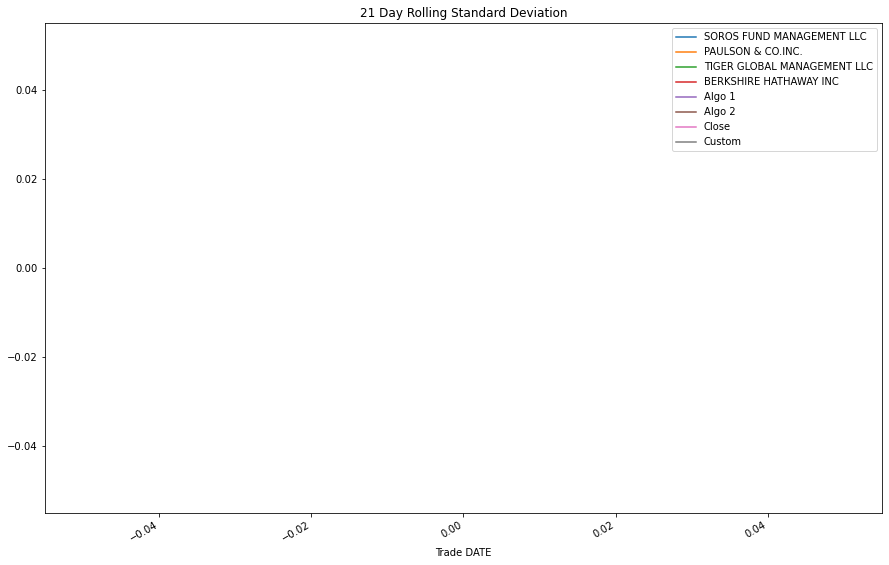

In [262]:
rollStdDev = culmRet.rolling(window=21).std()
rollStdDev.plot(figsize=(15, 10), title="21 Day Rolling Standard Deviation")

In [263]:
df = culmRet.corr()
df.style.background_gradient(cmap="bwr")

Q:\Anaconda\lib\site-packages\pandas\io\formats\style.py:1264: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
Q:\Anaconda\lib\site-packages\pandas\io\formats\style.py:1265: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close,Custom
SOROS FUND MANAGEMENT LLC,nan,nan,nan,nan,nan,nan,nan,nan
PAULSON & CO.INC.,nan,nan,nan,nan,nan,nan,nan,nan
TIGER GLOBAL MANAGEMENT LLC,nan,nan,nan,nan,nan,nan,nan,nan
BERKSHIRE HATHAWAY INC,nan,nan,nan,nan,nan,nan,nan,nan
Algo 1,nan,nan,nan,nan,nan,nan,nan,nan
Algo 2,nan,nan,nan,nan,nan,nan,nan,nan
Close,nan,nan,nan,nan,nan,nan,nan,nan
Custom,nan,nan,nan,nan,nan,nan,nan,nan


<AxesSubplot:title={'center':'custom Portfolio Beta'}, xlabel='Trade DATE'>

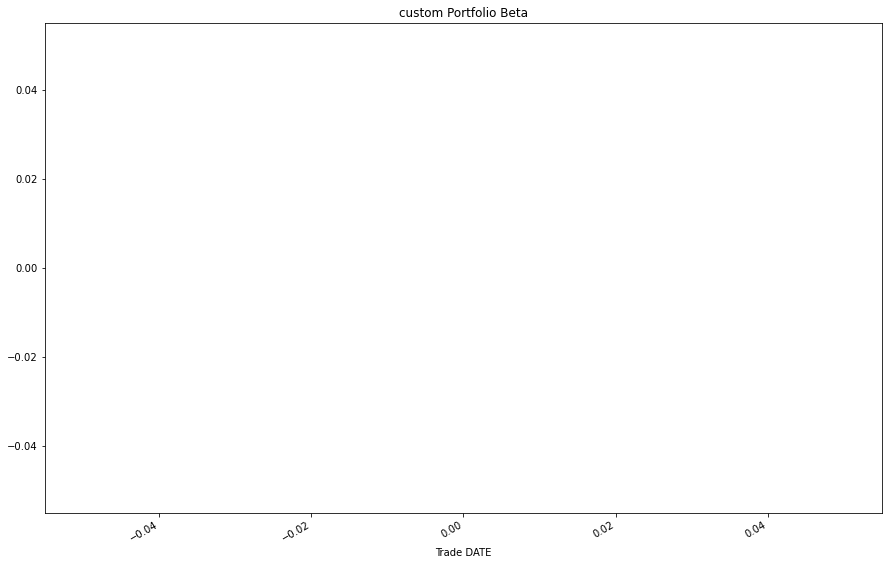

In [264]:
covariance = culmRet["Custom"].rolling(window=60).cov(culmRet["Close"])
variance = culmRet["Close"].rolling(60).var()
beta = (covariance / variance)
beta.plot(figsize=(15, 10), title="custom Portfolio Beta")

In [265]:
moarRat = (culmRet.mean()  * 252) / (culmRet.std() * np.sqrt(252))
moarRat

SOROS FUND MANAGEMENT LLC     NaN
PAULSON & CO.INC.             NaN
TIGER GLOBAL MANAGEMENT LLC   NaN
BERKSHIRE HATHAWAY INC        NaN
Algo 1                        NaN
Algo 2                        NaN
Close                         NaN
Custom                        NaN
dtype: float64

<AxesSubplot:title={'center':'Sharp Ratios'}>

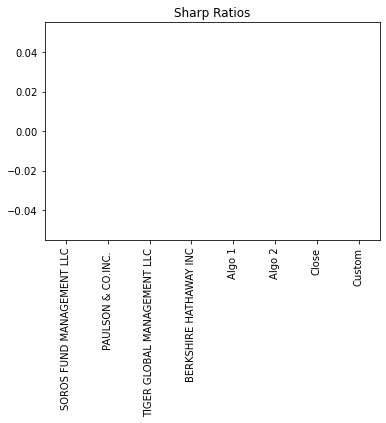

In [266]:
moarRat.plot(kind="bar", title="Sharp Ratios")

In [ ]:
#not sure where and not sure how but my code fell apart at the end. 